<a href="https://colab.research.google.com/github/tahmi-hub/Assignment_02/blob/main/PAIAss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/adult.csv')
df.replace('?', np.nan, inplace=True)
print("Shape of the dataset:", df.shape)



Shape of the dataset: (48842, 15)


In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [ ]:
print("\nUnique values per column:\n", df.nunique())



Unique values per column:
 age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64


In [ ]:
print("\nData types:\n", df.dtypes)



Data types:
 age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain      float64
 capital-loss      float64
 hours-per-week    float64
 native-country     object
 income             object
dtype: object


In [ ]:
print("\nStatistical summary:\n", df.describe(include='all'))



Statistical summary:
                  age workclass        fnlwgt education  educational-num  \
count   48842.000000     46043  4.884200e+04     48842     48842.000000   
unique           NaN         8           NaN        16              NaN   
top              NaN   Private           NaN   HS-grad              NaN   
freq             NaN     33906           NaN     15784              NaN   
mean       38.643585       NaN  1.896641e+05       NaN        10.078089   
std        13.710510       NaN  1.056040e+05       NaN         2.570973   
min        17.000000       NaN  1.228500e+04       NaN         1.000000   
25%        28.000000       NaN  1.175505e+05       NaN         9.000000   
50%        37.000000       NaN  1.781445e+05       NaN        10.000000   
75%        48.000000       NaN  2.376420e+05       NaN        12.000000   
max        90.000000       NaN  1.490400e+06       NaN        16.000000   

            marital-status      occupation relationship   race gender  \
cou

In [ ]:
print("\nIncome class distribution:\n", df['income'].value_counts())



Income class distribution:
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64


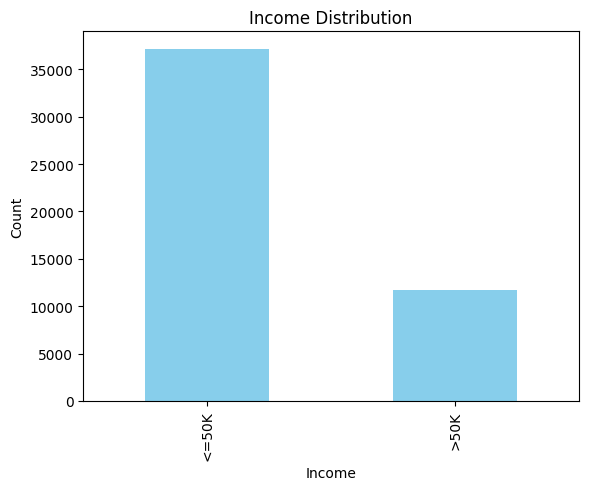

In [ ]:
# Plot income distribution
df['income'].value_counts().plot(kind='bar', title='Income Distribution', color='skyblue')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

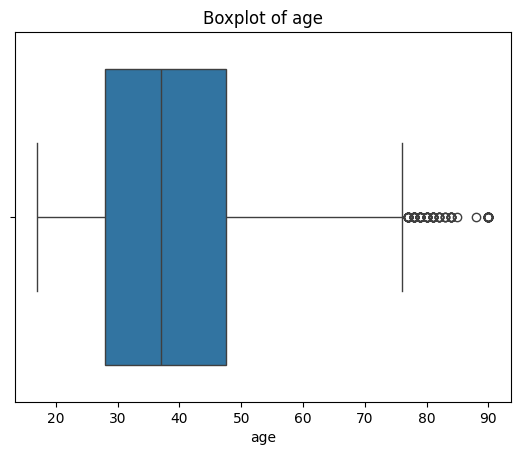

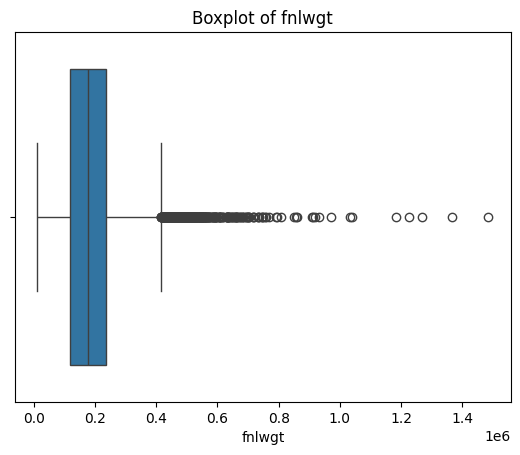

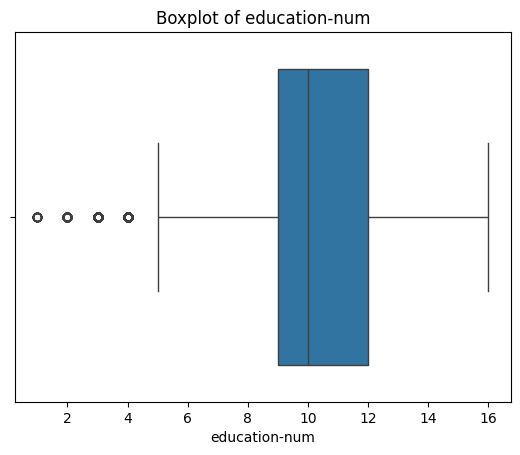

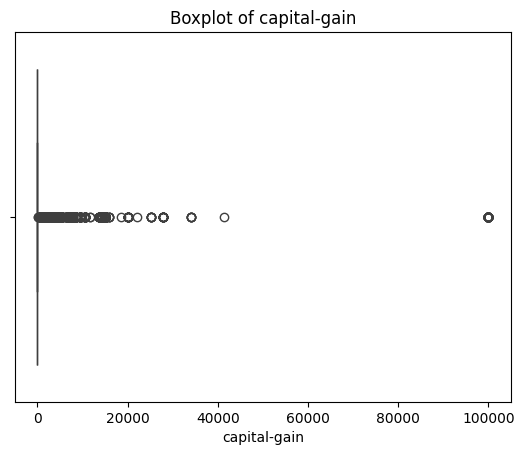

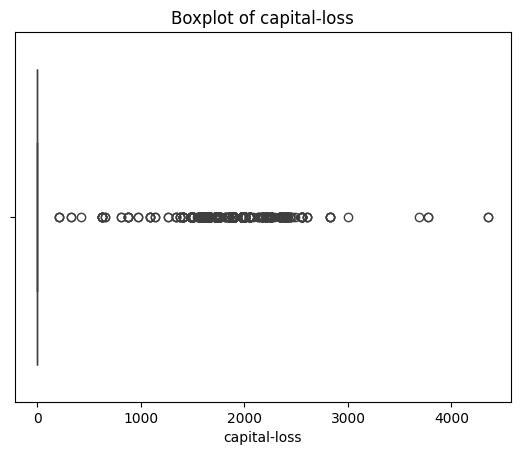

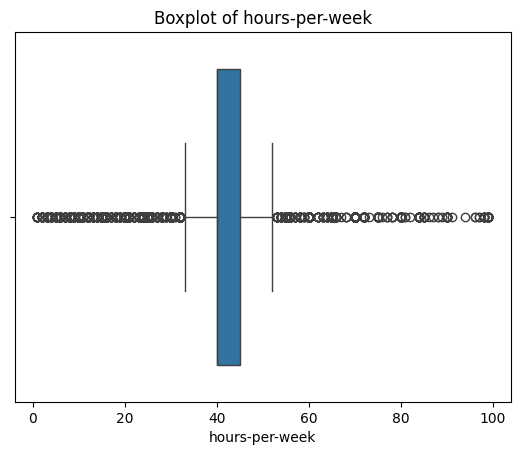

In [ ]:

# Boxplots for numerical features
numerical_cols = df.select_dtypes(include='number').columns
# Plot simple boxplots for each numeric column
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


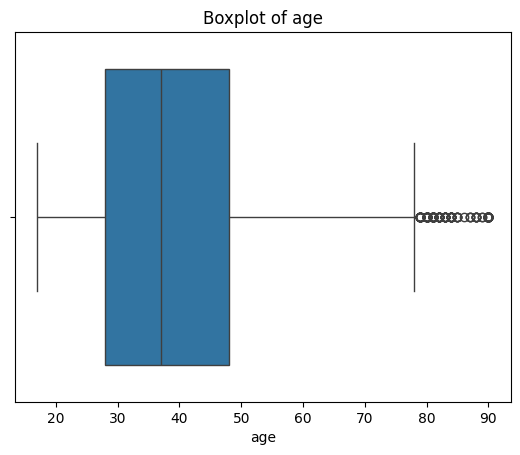

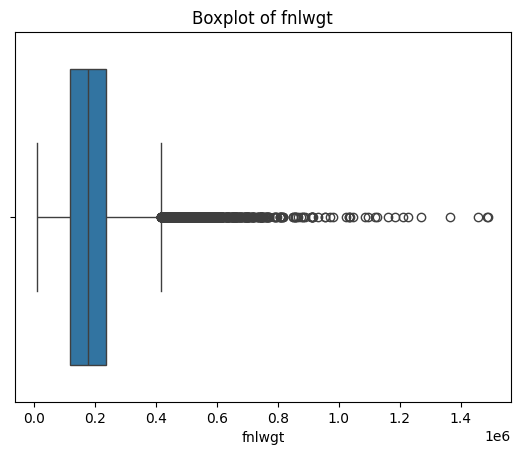

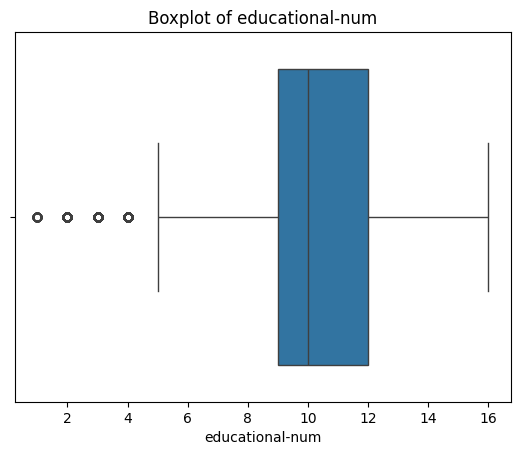

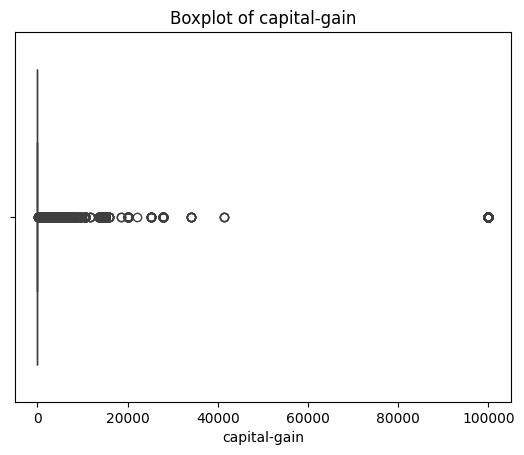

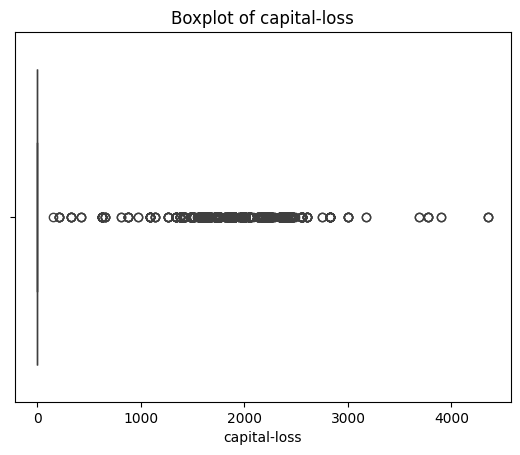

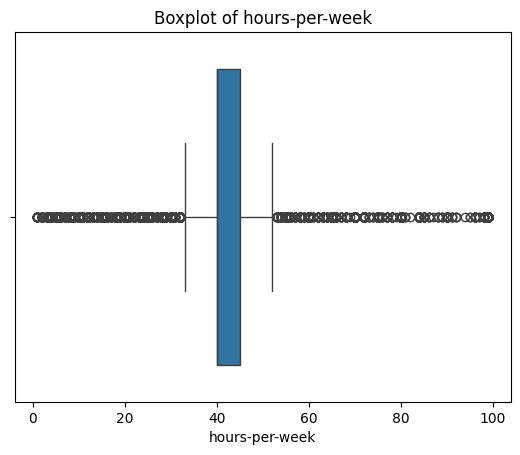

In [ ]:

# Histograms
numerical_cols = df.select_dtypes(include='number').columns
# Plot simple boxplots for each numeric column
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



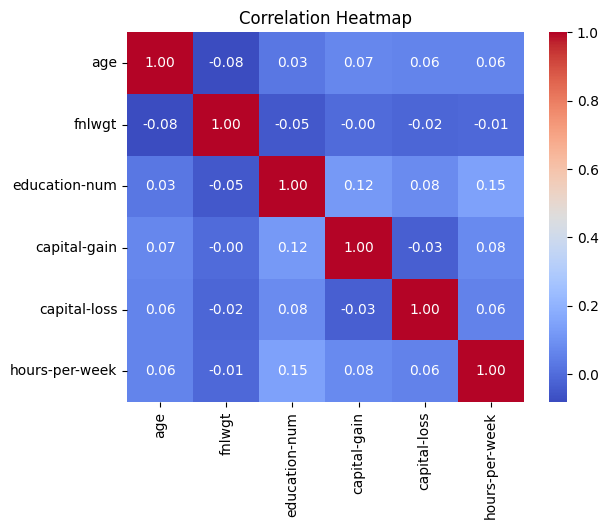

In [ ]:
# Correlation heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



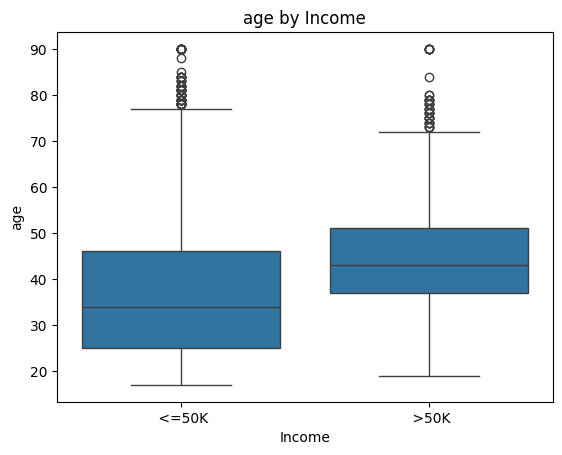

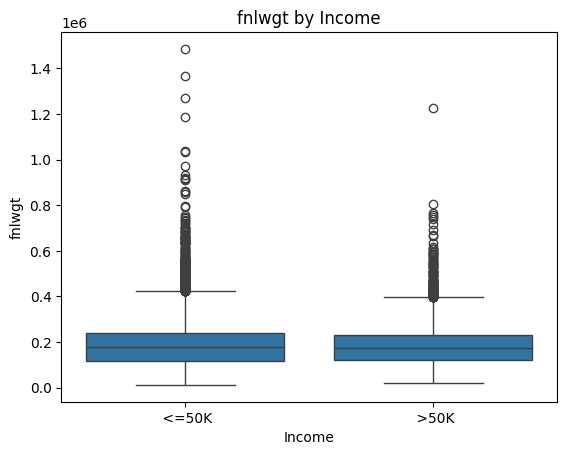

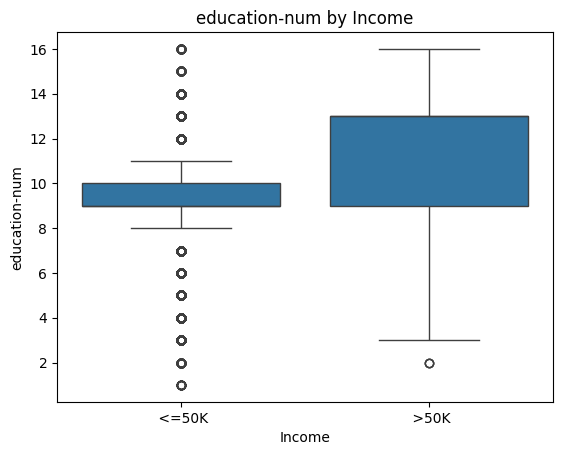

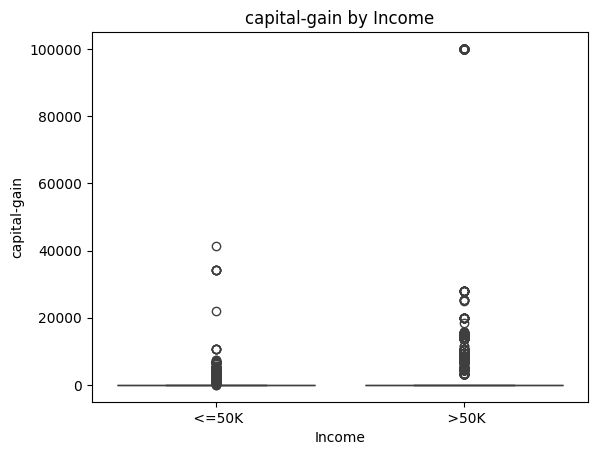

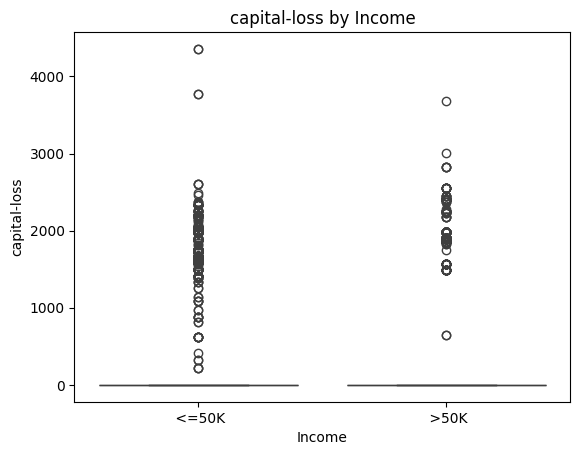

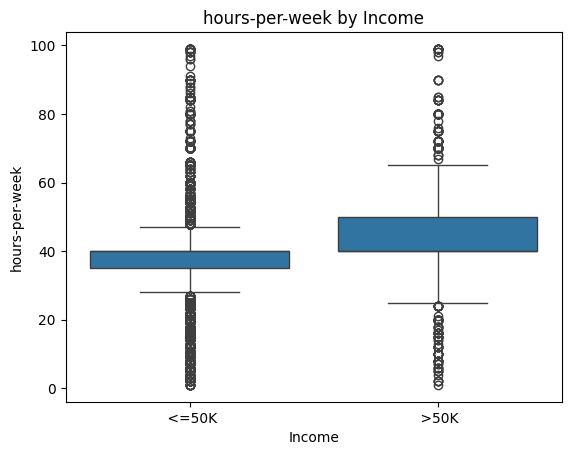

In [ ]:
# Boxplots for numerical features by income class
numerical_cols = df.select_dtypes(include='number').columns

# Boxplot of each numeric column by income class
for col in numerical_cols:
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'{col} by Income')
    plt.xlabel('Income')
    plt.ylabel(col)
    plt.show()


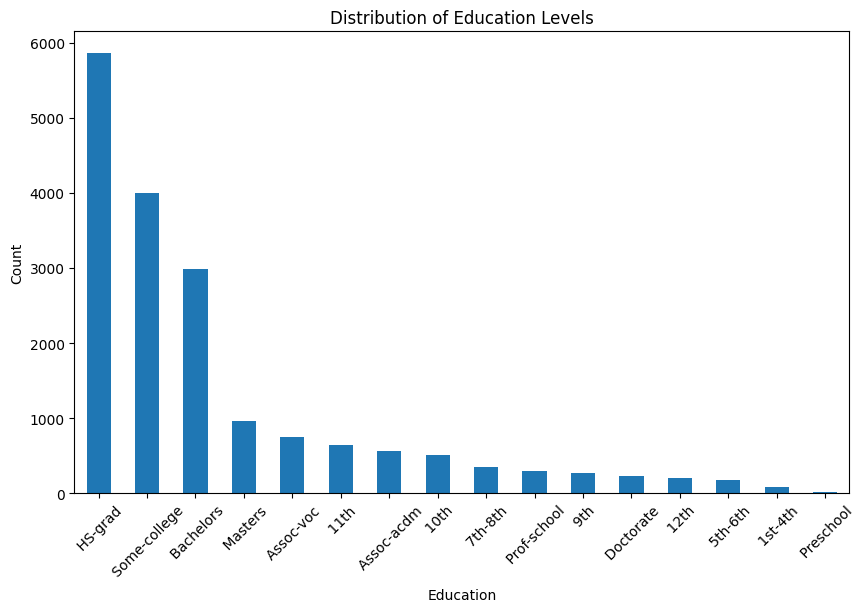

In [ ]:

df['education'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


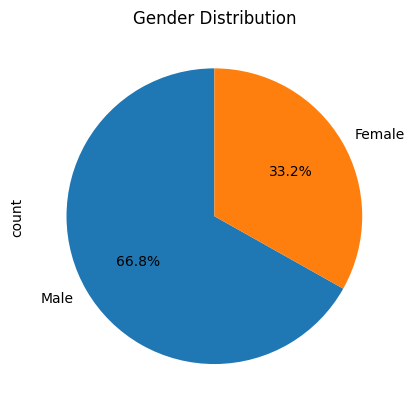

In [ ]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


In [ ]:
df.replace('?', pd.NA, inplace=True)
for col in df.columns:
    if df[col].isna().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])   # use mode for categorical
        else:
            df[col] = df[col].fillna(df[col].mean())      # use mean for numeric

# Drop duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isnull().sum())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
df.to_csv('cleaned_data.csv', index=False)


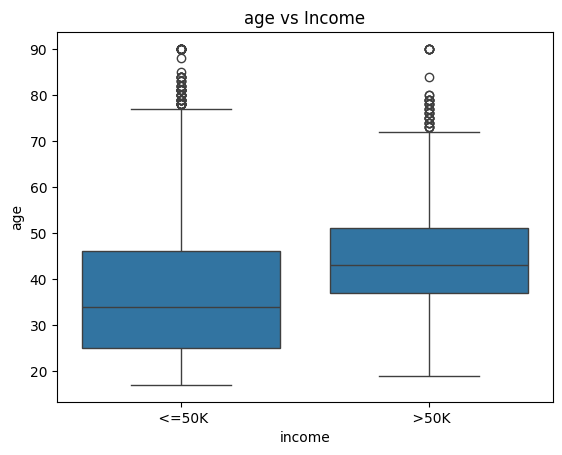

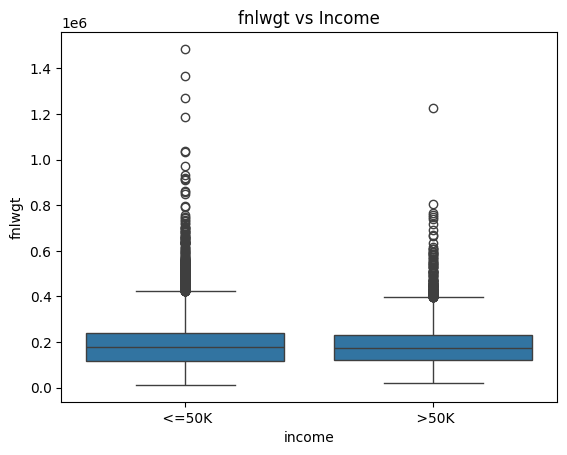

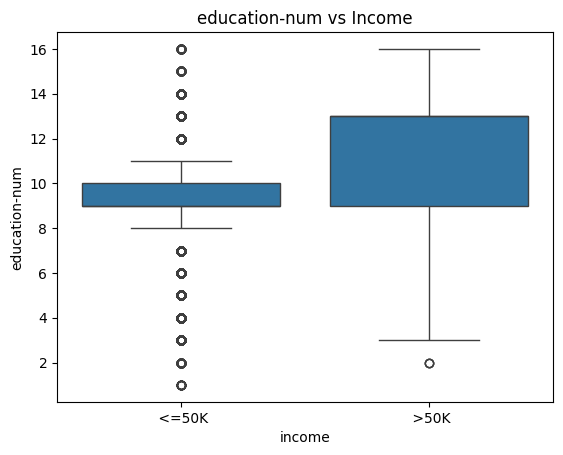

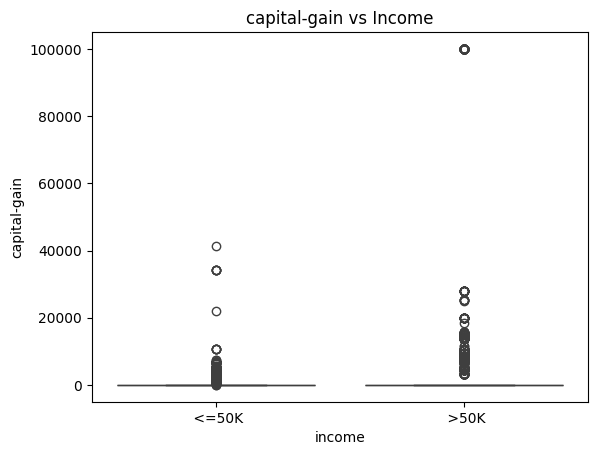

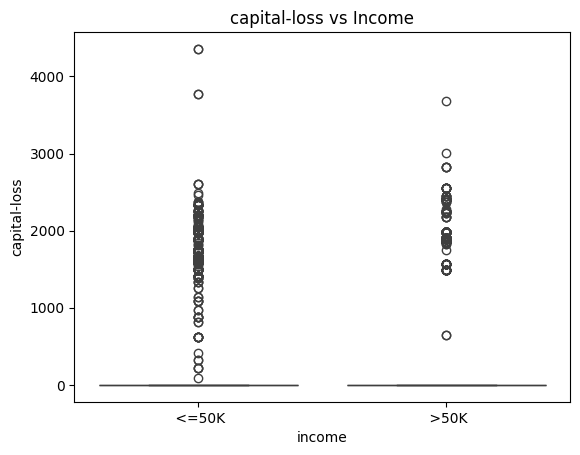

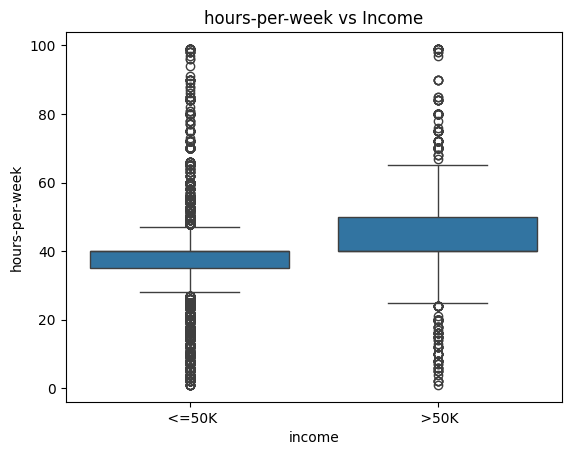

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in numerical_cols:
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'{col} vs Income')
    plt.show()


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/adult.csv')  # Replace with the path in your Drive

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

df = pd.read_csv('adult.csv')
df = df.drop_duplicates()
y = df['income']
X = df.drop(columns='income')


numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),

       ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)


KNN Model Accuracy: 0.8333674933387989
Confusion Matrix:
 [[6772  668]
 [ 958 1360]]
F1 Score: 0.6258628624022089
Precision: 0.6706114398422091
Recall: 0.5867126833477135
KNN Model Accuracy: 0.8333674933387989


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

df = pd.read_csv('adult.csv')
df = df.drop_duplicates()
y = df['income']
X = df.drop(columns='income')


numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())  # Standardize the numerical features
        ]), numerical_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features, output dense array
        ]), categorical_features)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the Naive Bayes pipeline
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('naive_bayes', GaussianNB())  # Use GaussianNB as the classifier
])

# Fit the Naive Bayes model
naive_bayes_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Naive Bayes Model Accuracy: 0.5998155359704858
Confusion Matrix:
 [[3700 3740]
 [ 165 2153]]
F1 Score: 0.5244184630373888
Precision: 0.3653487188189377
Recall: 0.9288179465056083


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Define your categorical and numerical features
categorical_features = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'native-country'
]

numerical_features = [
    'age', 'fnlwgt', 'educational-num', 'capital-gain',
    'capital-loss', 'hours-per-week'
]

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())  # Standardize the numerical features
        ]), numerical_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the Decision Tree pipeline
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier(random_state=42))  # Use DecisionTreeClassifier
])

# Fit the Decision Tree model
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Decision Tree Model Accuracy: 0.8196335346504248
Confusion Matrix:
 [[6546  933]
 [ 829 1461]]
F1 Score: 0.6238257899231426
Precision: 0.6102756892230576
Recall: 0.6379912663755458


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
df = pd.read_csv('adult.csv')
df = df.drop_duplicates()
y = df['income']
X = df.drop(columns='income')


numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
            ('scaler', StandardScaler())  # Standardize the numerical features
        ]), numerical_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create the Logistic Regression pipeline (regression model for classification)
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_regression', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression model
])

logistic_regression_pipeline.fit(X_train, y_train)

y_pred = logistic_regression_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Logistic Regression Model Accuracy: 0.8539659766345563
Confusion Matrix:
 [[6972  468]
 [ 957 1361]]
F1 Score: 0.6563781046539667
Precision: 0.74412247129579
Recall: 0.5871440897325281


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
df = pd.read_csv('adult.csv')
df = df.drop_duplicates()
y = df['income']
X = df.drop(columns='income')


numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#Ensemble
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

gb_pipeline.fit(X_train, y_train)
gb_preds = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        passthrough=True,
        cv=5
    ))
])

stacking_pipeline.fit(X_train, y_train)
stack_preds = stacking_pipeline.predict(X_test)
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, stack_preds))


Random Forest Accuracy: 0.8566304570608732
Gradient Boosting Accuracy: 0.8695429391268703
Stacking Ensemble Accuracy: 0.8685181389629022


In [ ]:
from google.colab import drive
drive.mount('/content/drive')